In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("../ModelData/solana.csv")
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
0,2020-08-11 06:00:00,2.8500,3.4700,2.8500,2.9515,20032.26,2020-08-11 06:59:59.999,61406.234710,267,8525.75,26428.370652,0
1,2020-08-11 07:00:00,2.9515,3.1355,2.8800,2.9224,42069.37,2020-08-11 07:59:59.999,125192.890211,472,15341.03,45571.929835,0
2,2020-08-11 08:00:00,2.9626,3.0000,2.9144,2.9600,24280.76,2020-08-11 08:59:59.999,71470.192551,209,11965.57,35183.719706,0
3,2020-08-11 09:00:00,2.9600,2.9736,2.8500,2.8543,26371.23,2020-08-11 09:59:59.999,77260.051345,230,6206.30,18224.874289,0
4,2020-08-11 10:00:00,2.8566,2.9329,2.8433,2.8976,26685.94,2020-08-11 10:59:59.999,76775.919879,277,5229.47,15089.814623,0


In [3]:
df.describe()

,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
count,46236.000000,46236.000000,46236.000000,46236.000000,4.623600e+04,4.623600e+04,4.623600e+04,4.623600e+04,4.623600e+04,46236.0
mean,90.786258,91.486157,90.057459,90.789176,1.855965e+05,1.653808e+07,3.747510e+04,9.225835e+04,8.249049e+06,0.0
std,73.845255,74.354981,73.309117,73.844522,2.120486e+05,2.540249e+07,6.147886e+04,1.077615e+05,1.282338e+07,0.0
min,1.184300,1.218200,1.030100,1.183200,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,22.430000,22.640000,22.230000,22.430000,7.221225e+04,2.628244e+06,5.039750e+03,3.502410e+04,1.287354e+06,0.0
50%,74.160000,74.915000,73.445000,74.165000,1.230907e+05,9.069967e+06,1.596800e+04,6.056482e+04,4.471691e+06,0.0
75%,154.110000,155.042500,153.030000,154.102500,2.200656e+05,2.078403e+07,4.661625e+04,1.092988e+05,1.028462e+07,0.0
max,286.230000,295.830000,284.200000,286.240000,4.974114e+06,7.742248e+08,1.695236e+06,2.599836e+06,3.922022e+08,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46236 entries, 0 to 46235
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   open_time               46236 non-null  object 
 1   open                    46236 non-null  float64
 2   high                    46236 non-null  float64
 3   low                     46236 non-null  float64
 4   close                   46236 non-null  float64
 5   volume                  46236 non-null  float64
 6   close_time              46236 non-null  object 
 7   quote_asset_volume      46236 non-null  float64
 8   number_of_trades        46236 non-null  int64  
 9   taker_buy_base_volume   46236 non-null  float64
 10  taker_buy_quote_volume  46236 non-null  float64
 11  ignore                  46236 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 4.2+ MB


In [5]:
df.isnull().sum()

open_time                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
ignore                    0
dtype: int64

In [6]:
# Convert open_time to datetime
df['open_time'] = pd.to_datetime(df['open_time'])
df = df.sort_values('open_time').reset_index(drop=True)    

In [7]:
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['open_time'].min()} to {df['open_time'].max()}")

Dataset shape: (46236, 12)
Date range: 2020-08-11 06:00:00 to 2025-11-20 13:00:00


In [8]:
# conversion of time into hour, day, week, month
df['day']       = df['open_time'].dt.day
df['month']     = df['open_time'].dt.month
df['hour']      = df['open_time'].dt.hour
df['dayofweek'] = df['open_time'].dt.dayofweek

In [9]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=6786a0781ee890c45455ad77740507fb84994da43fb563273073340618431681
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [10]:
import ta

# Rolling window lengths
WIN_7  = 7
WIN_30 = 30

#  PRICE RETURNS (Momentum Features)
# 1-day percentage change (short-term momentum)
df['ret_1d']  = df['close'].pct_change(1) * 100
# 7-day percentage change (weekly trend)
df['ret_7d']  = df['close'].pct_change(WIN_7) * 100
# 30-day percentage change (monthly trend)
df['ret_30d'] = df['close'].pct_change(WIN_30) * 100


# TECHNICAL INDICATORS (Trend/Momentum)

# RSI (Relative Strength Index) – measures overbought/oversold
df['rsi_val'] = ta.momentum.RSIIndicator(df['close']).rsi()
# EMA20 (short-term trend indicator)
df['ema_20']  = ta.trend.EMAIndicator(df['close'], window=20).ema_indicator()
# SMA50 (medium-term trend indicator)
df['sma_50']  = ta.trend.SMAIndicator(df['close'], window=50).sma_indicator()
# MACD – Captures trend + momentum together
df['macd_val'] = ta.trend.MACD(df['close']).macd()

# LAG FEATURES (Past Prices)

# Yesterday's close price
df['close_lag1'] = df['close'].shift(1)
# Close price 7 days ago
df['close_lag7'] = df['close'].shift(7)

# RAW PRICE FEATURES (Useful for candlestick pattern learning)
df['open_price']   = df['open']
df['high_price']   = df['high']
df['low_price']    = df['low']
df['close_price']  = df['close']
df['trade_volume'] = df['volume']

# Additional lag features
df['close_lag3'] = df['close'].shift(3)

# Renamed EMA for consistency
df['ema_20_smooth'] = df['ema_20']

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [11]:
df.drop(columns=["close_time", "quote_asset_volume", "taker_buy_base_volume", "taker_buy_quote_volume", "ignore"], inplace=True)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,open_time,open,high,low,close,volume,number_of_trades,day,month,hour,...,macd_val,close_lag1,close_lag7,open_price,high_price,low_price,close_price,trade_volume,close_lag3,ema_20_smooth
0,2020-08-11 06:00:00,2.8500,3.4700,2.8500,2.9515,20032.26,267,11,8,6,...,NaN,NaN,NaN,2.8500,3.4700,2.8500,2.9515,20032.26,NaN,NaN
1,2020-08-11 07:00:00,2.9515,3.1355,2.8800,2.9224,42069.37,472,11,8,7,...,NaN,2.9515,NaN,2.9515,3.1355,2.8800,2.9224,42069.37,NaN,NaN
2,2020-08-11 08:00:00,2.9626,3.0000,2.9144,2.9600,24280.76,209,11,8,8,...,NaN,2.9224,NaN,2.9626,3.0000,2.9144,2.9600,24280.76,NaN,NaN
3,2020-08-11 09:00:00,2.9600,2.9736,2.8500,2.8543,26371.23,230,11,8,9,...,NaN,2.9600,NaN,2.9600,2.9736,2.8500,2.8543,26371.23,2.9515,NaN
4,2020-08-11 10:00:00,2.8566,2.9329,2.8433,2.8976,26685.94,277,11,8,10,...,NaN,2.8543,NaN,2.8566,2.9329,2.8433,2.8976,26685.94,2.9224,NaN


In [12]:
df.isnull().sum()

open_time            0
open                 0
high                 0
low                  0
close                0
volume               0
number_of_trades     0
day                  0
month                0
hour                 0
dayofweek            0
ret_1d               1
ret_7d               7
ret_30d             30
rsi_val             13
ema_20              19
sma_50              49
macd_val            25
close_lag1           1
close_lag7           7
open_price           0
high_price           0
low_price            0
close_price          0
trade_volume         0
close_lag3           3
ema_20_smooth       19
dtype: int64

In [13]:
# dropping NANs
df = df.dropna()
df.info()
df_clean = df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 46187 entries, 49 to 46235
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   open_time         46187 non-null  datetime64[ns]
 1   open              46187 non-null  float64       
 2   high              46187 non-null  float64       
 3   low               46187 non-null  float64       
 4   close             46187 non-null  float64       
 5   volume            46187 non-null  float64       
 6   number_of_trades  46187 non-null  int64         
 7   day               46187 non-null  int32         
 8   month             46187 non-null  int32         
 9   hour              46187 non-null  int32         
 10  dayofweek         46187 non-null  int32         
 11  ret_1d            46187 non-null  float64       
 12  ret_7d            46187 non-null  float64       
 13  ret_30d           46187 non-null  float64       
 14  rsi_val           46187 no


Calculating Mutual Information scores for target 'close'...

------ Mutual Information Scores (Sorted) ------
close_price      9.148459
high_price       4.936700
low_price        4.912791
open_price       4.313725
close_lag1       4.312337
close_lag3       3.768489
ema_20           3.612092
ema_20_smooth    3.612092
close_lag7       3.374663
sma_50           3.140154
month            0.869228
macd_val         0.572349
day              0.510632
ret_1d           0.426204
ret_7d           0.202390
ret_30d          0.161481
dayofweek        0.104287
trade_volume     0.101218
rsi_val          0.077878
hour             0.000000


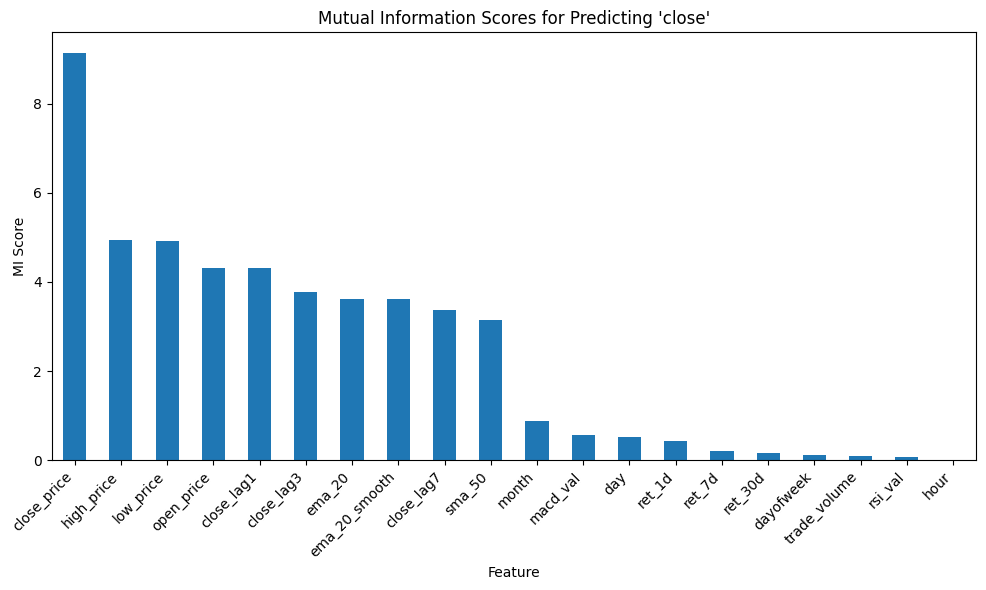

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

TARGET_COL = 'close'

# 1. Features 
features = [
    'ret_1d', 'ret_7d', 'ret_30d',
    'rsi_val', 'ema_20', 'sma_50', 'macd_val',
    'close_lag1', 'close_lag7', 'close_lag3',
    'day', 'month', 'hour', 'dayofweek',
    'open_price', 'high_price', 'low_price', 'close_price',
    'trade_volume', 'ema_20_smooth'
]

# 2. Build Clean DataFrame
df_mi = df[features + [TARGET_COL]].dropna()
# Input feature
X = df_mi[features]
# Target
y = df_mi[TARGET_COL]

# ============================
# 3. Mutual Information Scores
# ============================
print(f"\nCalculating Mutual Information scores for target '{TARGET_COL}'...\n")

mi_scores = mutual_info_regression(X, y, random_state=42)

# Convert to Pandas Series
mi_series = pd.Series(mi_scores, index=features, name='MI Score')
mi_series = mi_series.sort_values(ascending=False)

print("------ Mutual Information Scores (Sorted) ------")
print(mi_series.to_string())

# ============================
# 4. Plot Feature Importance
# ============================
plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title(f"Mutual Information Scores for Predicting '{TARGET_COL}'")
plt.ylabel("MI Score")
plt.xlabel("Feature")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [15]:
cols_to_drop = [
    "open_time", "month", "macd_val", "day", "ret_1d", "ret_7d",
    "ret_30d", "dayofweek", "trade_volume", "rsi_val", "hour"
]

df = df.drop(columns=cols_to_drop)

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

y = df[['open', 'close']].copy()
X = df.drop(columns=['open', 'close'], axis=1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

scaler_X = RobustScaler()
scaler_y = RobustScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled  = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

# Combine X + y back (keeps continuity)
train_scaled = np.hstack([X_train_scaled, y_train_scaled])
test_scaled  = np.hstack([X_test_scaled, y_test_scaled])

# Final continuous dataset for sequence input
full_scaled = np.vstack([train_scaled, test_scaled])

print("Full scaled shape:", full_scaled.shape)
print("Total features:", full_scaled.shape[1])


X shape: (46187, 14)
y shape: (46187, 2)
Full scaled shape: (46187, 16)
Total features: 16


In [17]:
def create_sequences(data, seq_length=60, target_size=2):
    X_seq, y_seq = [], []
    for i in range(seq_length, len(data)):
        # previous 60 rows → features
        X_seq.append(data[i-seq_length:i])

        # target = last 2 columns (open, close)
        y_seq.append(data[i, -target_size:])

    return np.array(X_seq), np.array(y_seq)

In [18]:
SEQ_LENGTH = 60

X_all, y_all = create_sequences(full_scaled, SEQ_LENGTH)

print("Sequence input shape:", X_all.shape)     # (samples, 60, features)
print("Sequence target shape:", y_all.shape)    # (samples, 2)


train_size = int(len(X_all) * 0.7)

X_train = X_all[:train_size]
X_test  = X_all[train_size:]

y_train = y_all[:train_size]
y_test  = y_all[train_size:]

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


Sequence input shape: (46127, 60, 16)
Sequence target shape: (46127, 2)
X_train: (32288, 60, 16)
X_test : (13839, 60, 16)
y_train: (32288, 2)
y_test : (13839, 2)


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    
    LSTM(128, return_sequences=True, 
         input_shape=(SEQ_LENGTH, X_train.shape[2]),
         kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(2)   # open, close
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss="mse", metrics=['mae']   # smoother than MSE
)
model.summary()

2025-12-07 09:58:40.313368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765101520.515627      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765101520.568488      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

I0000 00:00:1765101534.135840      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765101534.136541      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        74,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 60, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 60, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,026 (535.26 KB)

 Trainable params: 136,578 (533.51 KB)

 Non-trainable params: 448 (1.75 KB)

In [20]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5
    )
]

In [21]:
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=30,
    batch_size=64,
    callbacks=callbacks, 
    verbose = 1
)

Epoch 1/30


I0000 00:00:1765101540.261725     123 cuda_dnn.cc:529] Loaded cuDNN version 90300


455/455 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.9421 - mae: 0.6334 - val_loss: 0.2609 - val_mae: 0.1140 - learning_rate: 5.0000e-04
Epoch 2/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.4124 - mae: 0.3349 - val_loss: 0.2010 - val_mae: 0.0551 - learning_rate: 5.0000e-04
Epoch 3/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2589 - mae: 0.2140 - val_loss: 0.1579 - val_mae: 0.0708 - learning_rate: 5.0000e-04
Epoch 4/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1727 - mae: 0.1393 - val_loss: 0.1139 - val_mae: 0.0405 - learning_rate: 5.0000e-04
Epoch 5/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.1199 - mae: 0.1006 - val_loss: 0.0822 - val_mae: 0.0424 - learning_rate: 5.0000e-04
Epoch 6/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0866 - mae: 0.0864 - val_loss: 0.0598 - val_mae: 0.0499 - learning_rate: 5.0000e-04
Epoch 7/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0625 - mae: 0.0799 - val_loss: 0.0403 - val_mae: 0.0314 - learnin

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# --------- FIX 1: use correct scaler ---------
train_predict = scaler_y.inverse_transform(train_predict)
test_predict  = scaler_y.inverse_transform(test_predict)
y_train_actual = scaler_y.inverse_transform(y_train)
y_test_actual  = scaler_y.inverse_transform(y_test)

# RMSE
train_rmse_open  = np.sqrt(mean_squared_error(y_train_actual[:, 0], train_predict[:, 0]))
train_rmse_close = np.sqrt(mean_squared_error(y_train_actual[:, 1], train_predict[:, 1]))
test_rmse_open   = np.sqrt(mean_squared_error(y_test_actual[:, 0], test_predict[:, 0]))
test_rmse_close  = np.sqrt(mean_squared_error(y_test_actual[:, 1], test_predict[:, 1]))

# R2
train_r2_open  = r2_score(y_train_actual[:, 0], train_predict[:, 0])
train_r2_close = r2_score(y_train_actual[:, 1], train_predict[:, 1])
test_r2_open   = r2_score(y_test_actual[:, 0], test_predict[:, 0])
test_r2_close  = r2_score(y_test_actual[:, 1], test_predict[:, 1])

# MAE
train_mae_open  = mean_absolute_error(y_train_actual[:, 0], train_predict[:, 0])
train_mae_close = mean_absolute_error(y_train_actual[:, 1], train_predict[:, 1])
test_mae_open   = mean_absolute_error(y_test_actual[:, 0], test_predict[:, 0])
test_mae_close  = mean_absolute_error(y_test_actual[:, 1], test_predict[:, 1])

# Direction Accuracy
train_direction_acc_open  = np.mean(np.sign(np.diff(y_train_actual[:, 0])) == np.sign(np.diff(train_predict[:, 0]))) * 100
train_direction_acc_close = np.mean(np.sign(np.diff(y_train_actual[:, 1])) == np.sign(np.diff(train_predict[:, 1]))) * 100
test_direction_acc_open   = np.mean(np.sign(np.diff(y_test_actual[:, 0])) == np.sign(np.diff(test_predict[:, 0]))) * 100
test_direction_acc_close  = np.mean(np.sign(np.diff(y_test_actual[:, 1])) == np.sign(np.diff(test_predict[:, 1]))) * 100

print(f"\n=== Model Performance ===")
print(f"\nTRAINING SET:")
print(f"Open Price  - RMSE: ${train_rmse_open:.2f} | MAE: ${train_mae_open:.2f} | R²: {train_r2_open:.4f} | Direction Accuracy: {train_direction_acc_open:.2f}%")
print(f"Close Price - RMSE: ${train_rmse_close:.2f} | MAE: ${train_mae_close:.2f} | R²: {train_r2_close:.4f} | Direction Accuracy: {train_direction_acc_close:.2f}%")
print(f"\nTEST SET:")
# The goal is to see a significant improvement in these Test Set R² and RMSE values
print(f"Open Price  - RMSE: ${test_rmse_open:.2f} | MAE: ${test_mae_open:.2f} | R²: {test_r2_open:.4f} | Direction Accuracy: {test_direction_acc_open:.2f}%")
print(f"Close Price - RMSE: ${test_rmse_close:.2f} | MAE: ${test_mae_close:.2f} | R²: {test_r2_close:.4f} | Direction Accuracy: {test_direction_acc_close:.2f}%")


1009/1009 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

=== Model Performance ===

TRAINING SET:
Open Price  - RMSE: $3.32 | MAE: $2.66 | R²: 0.9967 | Direction Accuracy: 49.39%
Close Price - RMSE: $3.50 | MAE: $2.78 | R²: 0.9963 | Direction Accuracy: 48.95%

TEST SET:
Open Price  - RMSE: $4.94 | MAE: $3.84 | R²: 0.9786 | Direction Accuracy: 49.27%
Close Price - RMSE: $5.12 | MAE: $3.95 | R²: 0.9770 | Direction Accuracy: 49.03%


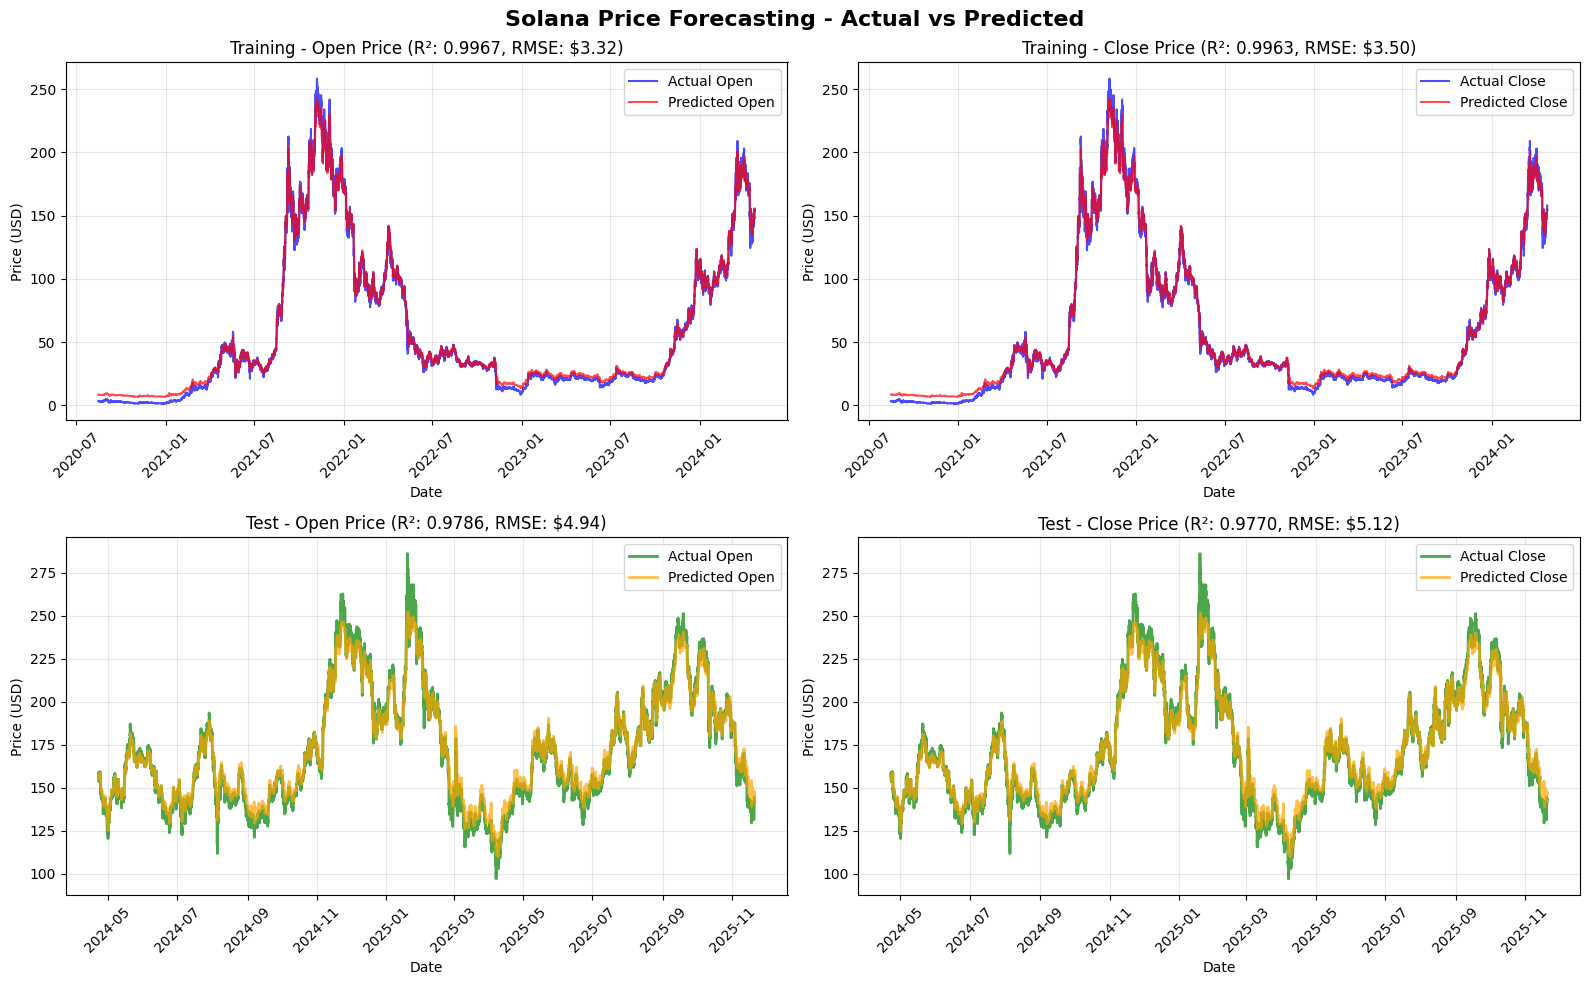

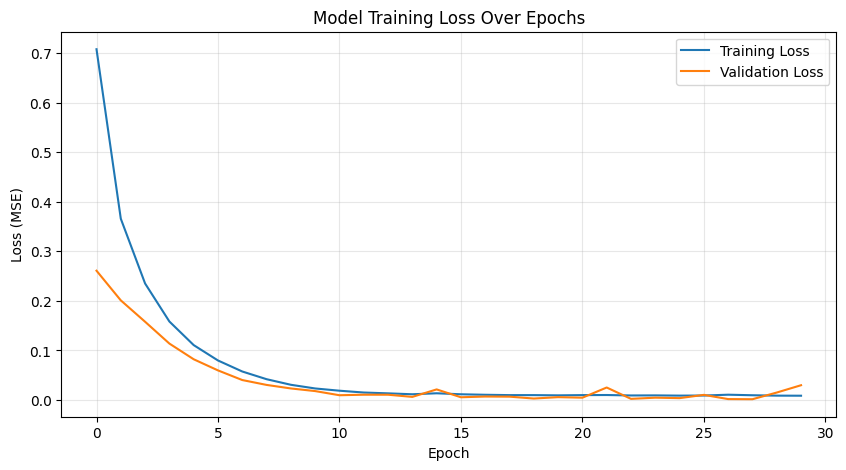


=== Sample Predictions (Last 5 Test Samples) ===
               Date  Actual Open  Predicted Open  Actual Close  Predicted Close
2025-11-20 09:00:00       143.39      148.130798        142.04       147.908539
2025-11-20 10:00:00       142.05      147.969543        142.26       147.747849
2025-11-20 11:00:00       142.26      147.615601        142.12       147.394836
2025-11-20 12:00:00       142.12      147.177261        142.02       146.957550
2025-11-20 13:00:00       142.02      146.888855        141.82       146.669769


In [23]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Solana Price Forecasting - Actual vs Predicted', fontsize=16, fontweight='bold')

# Get corresponding dates
train_dates = df_clean['open_time'][SEQ_LENGTH:SEQ_LENGTH+len(train_predict)]
test_dates = df_clean['open_time'][SEQ_LENGTH+len(train_predict):SEQ_LENGTH+len(train_predict)+len(test_predict)]

# Plot 1: Training Open Price
axes[0, 0].plot(train_dates, y_train_actual[:, 0], label='Actual Open', color='blue', alpha=0.7)
axes[0, 0].plot(train_dates, train_predict[:, 0], label='Predicted Open', color='red', alpha=0.7)
axes[0, 0].set_title(f'Training - Open Price (R²: {train_r2_open:.4f}, RMSE: ${train_rmse_open:.2f})')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price (USD)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Training Close Price
axes[0, 1].plot(train_dates, y_train_actual[:, 1], label='Actual Close', color='blue', alpha=0.7)
axes[0, 1].plot(train_dates, train_predict[:, 1], label='Predicted Close', color='red', alpha=0.7)
axes[0, 1].set_title(f'Training - Close Price (R²: {train_r2_close:.4f}, RMSE: ${train_rmse_close:.2f})')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price (USD)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Test Open Price
axes[1, 0].plot(test_dates, y_test_actual[:, 0], label='Actual Open', color='green', alpha=0.7, linewidth=2)
axes[1, 0].plot(test_dates, test_predict[:, 0], label='Predicted Open', color='orange', alpha=0.7, linewidth=2)
axes[1, 0].set_title(f'Test - Open Price (R²: {test_r2_open:.4f}, RMSE: ${test_rmse_open:.2f})')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price (USD)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Test Close Price
axes[1, 1].plot(test_dates, y_test_actual[:, 1], label='Actual Close', color='green', alpha=0.7, linewidth=2)
axes[1, 1].plot(test_dates, test_predict[:, 1], label='Predicted Close', color='orange', alpha=0.7, linewidth=2)
axes[1, 1].set_title(f'Test - Close Price (R²: {test_r2_close:.4f}, RMSE: ${test_rmse_close:.2f})')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price (USD)')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional plot: Training loss
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')
ax.set_title('Model Training Loss Over Epochs')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (MSE)')
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

# Show sample predictions
print("\n=== Sample Predictions (Last 5 Test Samples) ===")
sample_df = pd.DataFrame({
    'Date': test_dates.values[-5:],
    'Actual Open': y_test_actual[-5:, 0],
    'Predicted Open': test_predict[-5:, 0],
    'Actual Close': y_test_actual[-5:, 1],
    'Predicted Close': test_predict[-5:, 1]
})
print(sample_df.to_string(index=False))